

# Building a Compact Model for Water Channel Segmentation to Measure Water Contamination Due to Trash

Dataset Link:  https://drive.google.com/file/d/1VtGna3bdJ1ms-qm6AKIT9xvjrU190HSk/view?usp=sharing

**Instructions:**
The task of segmenting water channels in images to measure water contamination caused by trash. An opptimized and small neural network model with fewer parameters is used while maintaining segmentation accuracy.



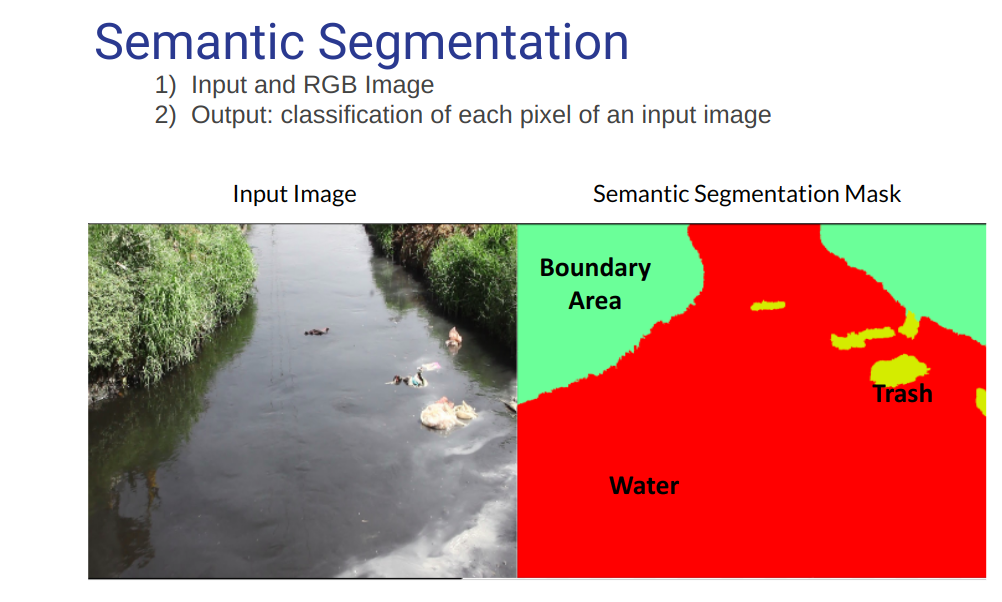

In [1]:
!pip install gdown
!gdown --id 1VtGna3bdJ1ms-qm6AKIT9xvjrU190HSk -O dataset.zip
!unzip dataset.zip -d ./dataset
!ls ./dataset

Streaming output truncated to the last 5000 lines.
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/3110.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/4902.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/494.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/623.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/1163.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/2376.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/3968.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/3407.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/1770.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/2544.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/1663.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/762.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/4910.png  
  inflating: ./dataset/5000 Sementic Segmentation/new_x_/69.png  
  

In [8]:
from keras.models import Model
from keras.layers import Input, DepthwiseConv2D, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, Dropout, UpSampling2D, concatenate
from keras.optimizers import Adam
from keras.metrics import MeanIoU
from keras.callbacks import ModelCheckpoint
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import Sequence, to_categorical

In [29]:
IMG_HEIGHT, IMG_WIDTH = 256, 256
NUM_CLASSES = 3
BATCH_SIZE = 3
LEARNING_RATE = 1e-4

inputs = Input((IMG_HEIGHT, IMG_WIDTH, 3))

def depthwise_block(x, filters, kernel_size=3, activation='relu'):
    x = DepthwiseConv2D(kernel_size, padding='same', depth_multiplier=1)(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = Conv2D(filters, kernel_size=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    return x

conv1 = depthwise_block(inputs, 32)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = depthwise_block(pool1, 64)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = depthwise_block(pool2, 128)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = depthwise_block(pool3, 256)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

bottleneck = depthwise_block(pool4, 512)
drop_bottleneck = Dropout(0.5)(bottleneck)

up4 = UpSampling2D(size=(2, 2))(drop_bottleneck)
merge4 = concatenate([conv4, up4], axis=-1)
conv5 = depthwise_block(merge4, 256)
drop_conv5 = Dropout(0.3)(conv5)
up3 = UpSampling2D(size=(2, 2))(drop_conv5)
merge3 = concatenate([conv3, up3], axis=-1)
conv6 = depthwise_block(merge3, 128)
drop_conv6 = Dropout(0.3)(conv6)
up2 = UpSampling2D(size=(2, 2))(drop_conv6)
merge2 = concatenate([conv2, up2], axis=-1)
conv7 = depthwise_block(merge2, 64)
up1 = UpSampling2D(size=(2, 2))(conv7)
merge1 = concatenate([conv1, up1], axis=-1)
conv8 = depthwise_block(merge1, 32)

output = Conv2D(NUM_CLASSES, kernel_size=1, activation='softmax')(conv8)

model = Model(inputs, output)
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d_27       │ (None, 256, 256, 3)    │             30 │ input_layer_3[0][0]    │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_54    │ (None, 256, 256, 3)    │             12 │ depthwise_conv2d_27[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_54             │ (None, 256, 256, 3)    │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 256, 256, 32)   │            128 │ activation_54[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_55    │ (None, 256, 256, 32)   │            128 │ conv2d_30[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_55             │ (None, 256, 256, 32)   │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 128, 128, 32)   │              0 │ activation_55[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d_28       │ (None, 128, 128, 32)   │            320 │ max_pooling2d_12[0][0] │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_56    │ (None, 128, 128, 32)   │            128 │ depthwise_conv2d_28[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_56             │ (None, 128, 128, 32)   │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 128, 128, 64)   │          2,112 │ activation_56[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_57    │ (None, 128, 128, 64)   │            256 │ conv2d_31[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_57             │ (None, 128, 128, 64)   │              0 │ batch_normalization_5… │
│ (Activation)         

 Total params: 469,677 (1.79 MB)

 Trainable params: 462,887 (1.77 MB)

 Non-trainable params: 6,790 (26.52 KB)

In [34]:
class DataGenerator(Sequence):
    def __init__(self, image_folder, label_folder, batch_size):
        self.image_folder = image_folder
        self.label_folder = label_folder
        self.batch_size = batch_size
        self.image_filenames = sorted(os.listdir(image_folder))
        self.label_filenames = sorted(os.listdir(label_folder))
        self.common_filenames = sorted(list(set(self.image_filenames) & set(self.label_filenames)))
        self.indices = np.arange(len(self.common_filenames))

    def __len__(self):
        return len(self.common_filenames) // self.batch_size

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_filenames = [self.common_filenames[i] for i in batch_indices]
        X, Y = self.__load_batch(batch_filenames)
        return X, Y

    def __load_batch(self, filenames):
        X = []
        Y = []
        for filename in filenames:
            img_path = os.path.join(self.image_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            X.append(img / 255.0)

            label_path = os.path.join(self.label_folder, filename)
            label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
            label = cv2.resize(label, (IMG_WIDTH, IMG_HEIGHT))
            label = np.clip(label, 0, NUM_CLASSES - 1)
            label = np.expand_dims(label, axis=-1)
            label = to_categorical(label, num_classes=NUM_CLASSES)
            Y.append(label)

        return np.array(X), np.array(Y)

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

In [37]:
checkpoint_callback = ModelCheckpoint(
    filepath='/content/model.keras',
    monitor='accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

train_generator = DataGenerator(
    image_folder='/content/dataset/5000 Sementic Segmentation/new_x_',
    label_folder='/content/dataset/5000 Sementic Segmentation/new_y_',
    batch_size=BATCH_SIZE
)

history = model.fit(
    train_generator,
    epochs=1,
    verbose=1,
    callbacks=[checkpoint_callback]
)

1782/1783 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9495 - loss: 0.3515
Epoch 1: accuracy improved from -inf to 0.97421, saving model to /content/model.keras
1783/1783 ━━━━━━━━━━━━━━━━━━━━ 89s 50ms/step - accuracy: 0.9495 - loss: 0.3514


In [38]:
model.load_weights('/content/model.keras')

In [42]:
def predict_(input_img_path):
    input_ = cv2.imread(input_img_path)
    if input_ is None:
        print("Failed to load the image. Please check the file path.")
        return

    input_ = cv2.resize(input_, (256, 256), interpolation=cv2.INTER_NEAREST)
    input_ = input_.reshape(1, 256, 256, 3) / 255.0
    pre = model.predict(input_)
    pre = np.argmax(pre.reshape(256, 256, NUM_CLASSES), axis=-1)
    output = np.stack([pre * 255 // (NUM_CLASSES - 1)] * 3, axis=-1)
    cv2_imshow(output.astype(np.uint8))

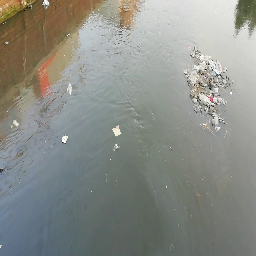

In [43]:
img = cv2.imread('/content/dataset/5000 Sementic Segmentation/new_x_/6.png')
input_ = cv2.resize(img, (256,256), interpolation = cv2.INTER_NEAREST)
cv2_imshow(input_)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


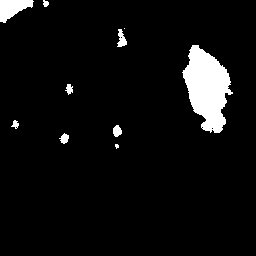

In [44]:
predict_("/content/dataset/5000 Sementic Segmentation/new_x_/6.png")